# Redes Neurais - Formação Cientista de Dados
### Criação de redes neurais

In [ ]:
install.packages("neuralnet")

In [18]:
library(neuralnet)

### Será usado do conjunto de dados iris, mas ele será modificado, 
### portanto será feito uma cópia dele com outro nome e a cópia será alterada.

In [19]:
myiris = iris

In [20]:
#Verificação se a coluna possui a espécie setosa, versicolor ou virginica
# A função cbind cria colunas e a rbind colunas
myiris = cbind(myiris, myiris$Species == 'setosa')
head(myiris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,"myiris$Species == ""setosa"""
5.1,3.5,1.4,0.2,setosa,TRUE
4.9,3.0,1.4,0.2,setosa,TRUE
4.7,3.2,1.3,0.2,setosa,TRUE
4.6,3.1,1.5,0.2,setosa,TRUE
5.0,3.6,1.4,0.2,setosa,TRUE
5.4,3.9,1.7,0.4,setosa,TRUE


In [21]:
tail(myiris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,"myiris$Species == ""setosa"""
145,6.7,3.3,5.7,2.5,virginica,FALSE
146,6.7,3.0,5.2,2.3,virginica,FALSE
147,6.3,2.5,5.0,1.9,virginica,FALSE
148,6.5,3.0,5.2,2.0,virginica,FALSE
149,6.2,3.4,5.4,2.3,virginica,FALSE
150,5.9,3.0,5.1,1.8,virginica,FALSE


In [22]:
myiris = cbind(myiris, myiris$Species == 'versicolor')

In [23]:
myiris = cbind(myiris, myiris$Species == 'virginica')

In [24]:
summary(myiris)

  Sepal.Length       Sepal.Width        Petal.Length    Petal.Width      
 Min.   :4.300000   Min.   :2.000000   Min.   :1.000   Min.   :0.100000  
 1st Qu.:5.100000   1st Qu.:2.800000   1st Qu.:1.600   1st Qu.:0.300000  
 Median :5.800000   Median :3.000000   Median :4.350   Median :1.300000  
 Mean   :5.843333   Mean   :3.057333   Mean   :3.758   Mean   :1.199333  
 3rd Qu.:6.400000   3rd Qu.:3.300000   3rd Qu.:5.100   3rd Qu.:1.800000  
 Max.   :7.900000   Max.   :4.400000   Max.   :6.900   Max.   :2.500000  
       Species   myiris$Species == "setosa" myiris$Species == "versicolor"
 setosa    :50   Mode :logical              Mode :logical                 
 versicolor:50   FALSE:100                  FALSE:100                     
 virginica :50   TRUE :50                   TRUE :50                      
                                                                          
                                                                          
                                

Renomeação das ultimas colunas para criar uma amostra

In [25]:
names(myiris) [6] = 'setosa'
names(myiris) [7] = 'versicolor'
names(myiris) [8] = 'virginica'
summary(myiris)

  Sepal.Length       Sepal.Width        Petal.Length    Petal.Width      
 Min.   :4.300000   Min.   :2.000000   Min.   :1.000   Min.   :0.100000  
 1st Qu.:5.100000   1st Qu.:2.800000   1st Qu.:1.600   1st Qu.:0.300000  
 Median :5.800000   Median :3.000000   Median :4.350   Median :1.300000  
 Mean   :5.843333   Mean   :3.057333   Mean   :3.758   Mean   :1.199333  
 3rd Qu.:6.400000   3rd Qu.:3.300000   3rd Qu.:5.100   3rd Qu.:1.800000  
 Max.   :7.900000   Max.   :4.400000   Max.   :6.900   Max.   :2.500000  
       Species     setosa        versicolor      virginica      
 setosa    :50   Mode :logical   Mode :logical   Mode :logical  
 versicolor:50   FALSE:100       FALSE:100       FALSE:100      
 virginica :50   TRUE :50        TRUE :50        TRUE :50       
                                                                
                                                                
                                                                

Criação de uma amostra do myiris e separação de parte dela apra treino e outra para teste das redes neurais

In [26]:
amostra = sample(2,150,replace =T, prob=c(0.7,0.3))
myiristreino = myiris[amostra==1,]
myiristeste = myiris[amostra==2,]
dim(myiristreino)

[1] 102   8

In [27]:
dim(myiristeste)

[1] 48  8

In [28]:
modelo = neuralnet(setosa + versicolor + virginica ~ 
                   Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, myiristreino, hidden = c(5,4))

In [29]:
modelo

$call
neuralnet(formula = setosa + versicolor + virginica ~ Sepal.Length + 
    Sepal.Width + Petal.Length + Petal.Width, data = myiristreino, 
    hidden = c(5, 4))

$response
    setosa versicolor virginica
1     TRUE      FALSE     FALSE
2     TRUE      FALSE     FALSE
3     TRUE      FALSE     FALSE
4     TRUE      FALSE     FALSE
5     TRUE      FALSE     FALSE
7     TRUE      FALSE     FALSE
9     TRUE      FALSE     FALSE
11    TRUE      FALSE     FALSE
12    TRUE      FALSE     FALSE
13    TRUE      FALSE     FALSE
14    TRUE      FALSE     FALSE
15    TRUE      FALSE     FALSE
16    TRUE      FALSE     FALSE
18    TRUE      FALSE     FALSE
19    TRUE      FALSE     FALSE
20    TRUE      FALSE     FALSE
23    TRUE      FALSE     FALSE
24    TRUE      FALSE     FALSE
25    TRUE      FALSE     FALSE
26    TRUE      FALSE     FALSE
27    TRUE      FALSE     FALSE
28    TRUE      FALSE     FALSE
29    TRUE      FALSE     FALSE
30    TRUE      FALSE     FALSE
32    TRUE      FALSE  

### plotagem da rede neural

In [48]:
plot(modelo)

In [34]:
teste = compute(modelo,myiristeste [,1:4])

In [35]:
teste$net.result

6,1.000009322016582,-0.0031922404994,0.0033053421893
8,1.000005593880533,-0.0012276660691,0.0012823052499
10,1.000000235558714,0.0015959492432,-0.0016253362176
17,1.000014680197006,-0.0060157813020,0.0062129069299
21,1.000004411759454,-0.0006047368589,0.0006408386892
22,1.000007203558430,-0.0020759001451,0.0021557813791
31,0.999993061169650,0.0053765573331,-0.0055184489963
33,1.000015753021576,-0.0065811157457,0.0067950647983
36,1.000007184874126,-0.0020660542852,0.0021456425226
37,1.000012564944995,-0.0049011304525,0.0050650859014
39,0.999993796102239,0.0049892780726,-0.0051196449409


In [38]:
resultado = as.data.frame(teste$net.result)
names(resultado)[1] = 'setosa'
names(resultado)[2] = 'versicolor'
names(resultado)[3] = 'virginica'
head(resultado)

,setosa,versicolor,virginica
6,1.000009322,-0.0031922404994,0.0033053421893
8,1.000005594,-0.0012276660691,0.0012823052499
10,1.000000236,0.0015959492432,-0.0016253362176
17,1.000014680,-0.0060157813020,0.0062129069299
21,1.000004412,-0.0006047368589,0.0006408386892
22,1.000007204,-0.0020759001451,0.0021557813791


In [39]:
resultado$class = colnames(resultado[,1:3]) [max.col(resultado[,1:3],ties.method = 'first')]
head(resultado)

,setosa,versicolor,virginica,class
6,1.000009322,-0.0031922404994,0.0033053421893,setosa
8,1.000005594,-0.0012276660691,0.0012823052499,setosa
10,1.000000236,0.0015959492432,-0.0016253362176,setosa
17,1.000014680,-0.0060157813020,0.0062129069299,setosa
21,1.000004412,-0.0006047368589,0.0006408386892,setosa
22,1.000007204,-0.0020759001451,0.0021557813791,setosa


In [40]:
resultado

,setosa,versicolor,virginica,class
6,1.000009322016582,-0.0031922404994,0.0033053421893,setosa
8,1.000005593880533,-0.0012276660691,0.0012823052499,setosa
10,1.000000235558714,0.0015959492432,-0.0016253362176,setosa
17,1.000014680197006,-0.0060157813020,0.0062129069299,setosa
21,1.000004411759454,-0.0006047368589,0.0006408386892,setosa
22,1.000007203558430,-0.0020759001451,0.0021557813791,setosa
31,0.999993061169650,0.0053765573331,-0.0055184489963,setosa
33,1.000015753021576,-0.0065811157457,0.0067950647983,setosa
36,1.000007184874126,-0.0020660542852,0.0021456425226,setosa
37,1.000012564944995,-0.0049011304525,0.0050650859014,setosa


In [42]:
confusao = table(resultado$class, myiristeste$Species)
sum(diag(confusao) * 100 / sum(confusao))

[1] 100

In [43]:
confusao

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         16         0
  virginica       0          0        17

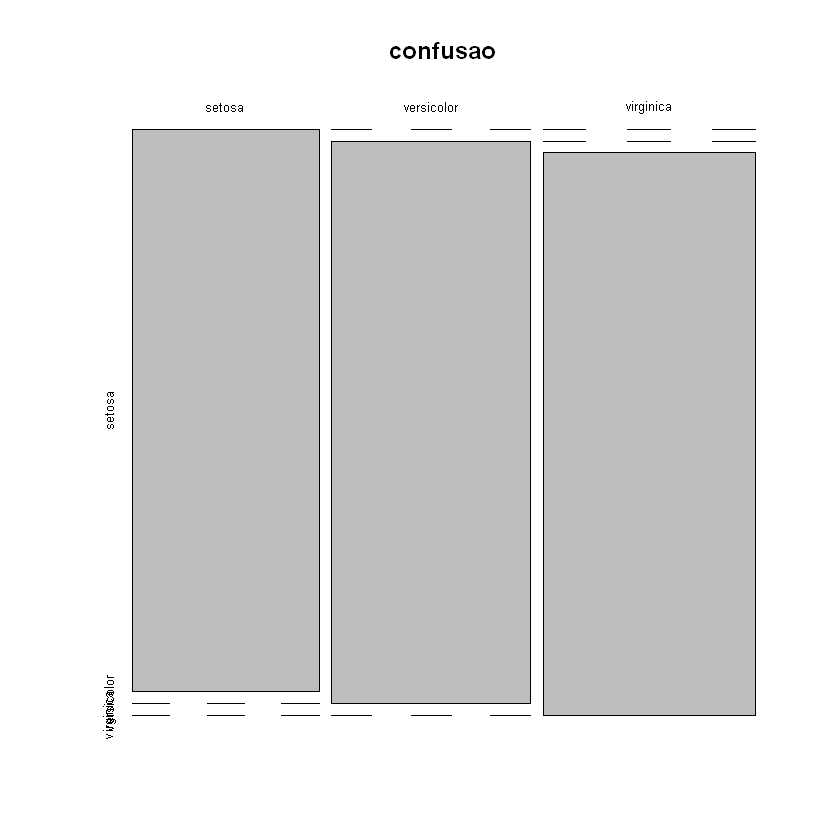

In [44]:
plot (confusao)